<a href="https://colab.research.google.com/github/seawavve/NLP_wavve/blob/main/Translator_%EB%B9%84%EA%B5%90%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SetUp

In [1]:
! pip install googletrans==4.0.0-rc1
! pip install git+https://github.com/kakaobrain/pororo.git

     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 51.5 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=76da976b2ddd6829c9239273b89ec014ec6351103e8bf464113f5972946130fc
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
  Cloning https://github.com/kakaobrain/pororo.git to /tmp/pip-req-build-ea6nvbtq
  Running command git clone -q https://github.com/kakaobrain/pororo.git /tmp/pip-req-build-ea6nvbtq
     |████████████████████████████████| 748.8 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 7.6 MB/s 
     |████████████████████████████████| 1.7 MB 58.8 MB/s 
     |████████████████████████████████| 3.8 MB 46.9 MB/s 
    

In [4]:
import time
text = '멋진 인공지능 개발자가 되겠습니다.'

### Translator 비교분석
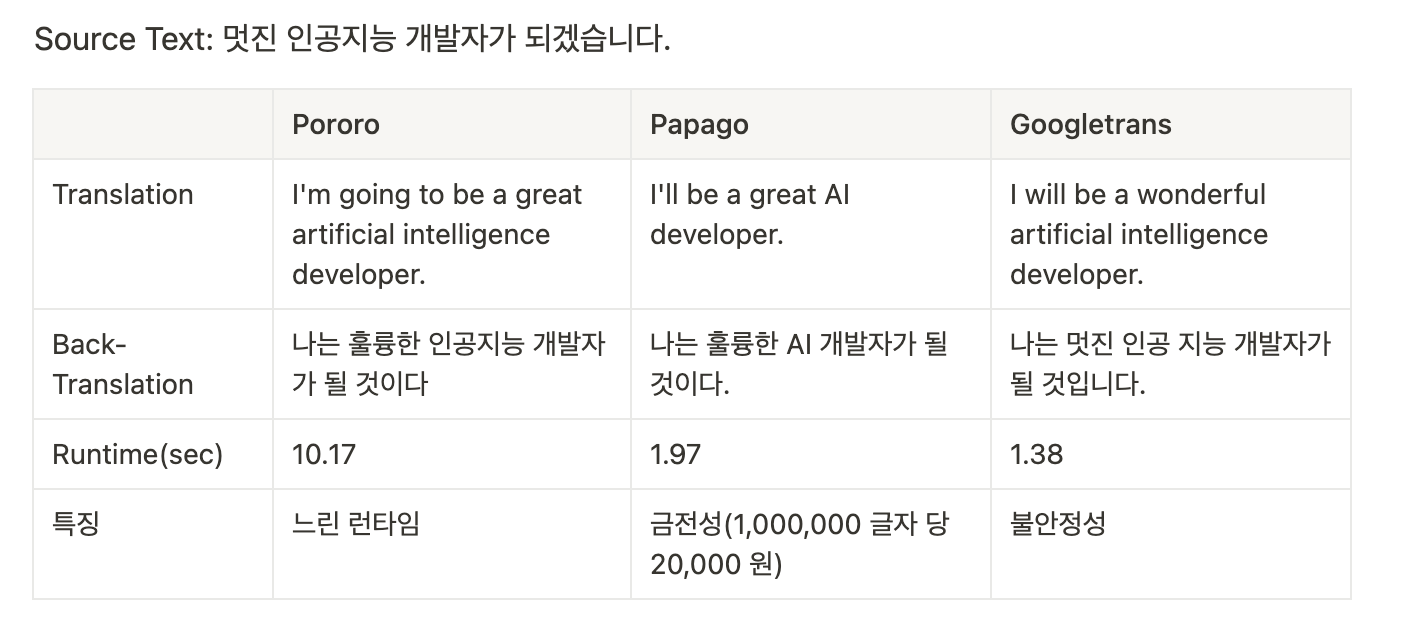

In [28]:
# Papago
import requests
client_id = "[CLIENT_ID]"
client_secret = "[CLIENT_SECRET_KEY]"
def en_ko_get_translate(text):
    data = {'text' : text,#inputtext
            'source' : 'en',#input lan
            'target': 'ko'}#output lan

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data= data)
    rescode = response.status_code

    if(rescode==200):
        t_data = response.json()
        return response.json()['message']['result']['translatedText']
    else:
        print("Error Code:" , rescode)
        return 0
def ko_en_get_translate(text):
    data = {'text' : text,#inputtext
            'source' : 'ko',#input lan
            'target': 'en'}#output lan

    url = "https://openapi.naver.com/v1/papago/n2mt"

    header = {"X-Naver-Client-Id":client_id,
              "X-Naver-Client-Secret":client_secret}

    response = requests.post(url, headers=header, data= data)
    rescode = response.status_code

    if(rescode==200):
        t_data = response.json()
        return response.json()['message']['result']['translatedText']
    else:
        print("Error Code:" , rescode)
        return 0

start=time.time()
print("Source Text:", text)
translated_text = ko_en_get_translate(text)
print("Translated Text:", translated_text)
back_translated_text = en_ko_get_translate(translated_text)
print("Back Translated Text:", back_translated_text)
end = time.time()
runtime = end - start
print("Time:", runtime)

Source Text: 멋진 인공지능 개발자가 되겠습니다.
Translated Text: I'll be a great AI developer.
Back Translated Text: 나는 훌륭한 AI 개발자가 될 것이다.
Time: 1.9775030612945557


In [16]:
# Googletrans
import googletrans
from googletrans import Translator 

start=time.time()
translator = Translator()
ko_en_trans = translator.translate(text, src='ko', dest='en')
translated_text = ko_en_trans.text
en_ko_trans = translator.translate(translated_text, src='en', dest='ko')

print("Source Text:", text)
print("Translated Text:", translated_text)
print("Back Translated Text:", en_ko_trans.text)

end = time.time()
runtime = end - start
print("Time:", runtime)

Source Text: 멋진 인공지능 개발자가 되겠습니다.
Translated Text: I will be a wonderful artificial intelligence developer.
Back Translated Text: 나는 멋진 인공 지능 개발자가 될 것입니다.
Time: 1.3821728229522705


In [17]:
# Pororo
from pororo import Pororo
start=time.time()
mt = Pororo(task="translation", lang="multi")
trans_text = mt(text, src="ko", tgt="en")
back_trans_text = mt(trans_text, src="en", tgt="ko")


print("Source Text:", text)
print("Translated Text:", trans_text)
print("Back Translated Text:", back_trans_text)

end = time.time()
runtime = end - start
print("Time:", runtime)

Source Text: 멋진 인공지능 개발자가 되겠습니다.
Translated Text: I'm going to be a great artificial intelligence developer.
Back Translated Text: 나는 훌륭한 인공지능 개발자가 될 것이다
Time: 10.171420812606812
